# Introduction
    
Most professionals spend most of their time at work, with a majority of them spending an average of eight hours a day at work and some pulling extra hours (Leung et al., 2018), leaving them with little to no time to prepare a healthy meal. As a result, they eat unhealthy food at work and home. Unhealthy eating habits have been linked to health challenges such as chronic heart conditions in employees (McCurley et al., 2019). One of the ways to prevent age-related health issues and maintain good health is through a healthy diet (Yeung et al., 2021), but how do you develop healthy eating habits when you have no time to cook a nutritious meal? Apprentice Chef Inc. is the solution to this problem.

Apprentice Chef, Inc. is an innovative company that offers exceptional home cooking solutions. It was established explicitly for busy working adults with little to no skills in the kitchen, and they have a variety of daily-prepared meals delivered directly to your door. Ordering meals is easy, given their user-friendly online platform and mobile app. It takes around 30 minutes to finish cooking each meal set at home, and it comes with Apprentice Chef's award-winning disposable cookware (i.e. pots, and utensils), allowing for fast and easy cleanup.

For Apprentice Chef Inc to remain relevant in the business in a competitive market, they must provide excellent food quality and great customer experience, which will increase revenue. Predictive analysis can study customers' behavior concerning their activities on the website or the food they order. Predictive analysis uses past data to detect relationships and patterns in the data and predicts the future based on this relationship (Zahra & Mahmoud, 2017). Understanding customers' behavior and how their behavior could change can improve customer experience, increasing revenue. 

 
## Objective
This study aims to build a predictive model on the revenue of Apprentice Chef Inc.

## Assumptions
•	Approximately 2,000 datasets
•	Customers made at least one purchase per month for 11 of their first 12 months.
•	Customers made at least one purchase per quarter and at least 15 purchases throughout their first year.
 
## Data Analysis Outline
1.	Importing necessary libraries
2.	Data exploration and feature engineering
3.  Data Preparation
4.	Building Models


### Importing the necessary libraries
Importing all the packages that will be used in creating a model

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # regression modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn
# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm


# importing machine learning tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.tree import plot_tree    


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './Apprentice_Chef_Dataset_2023.xlsx'


# reading the file into Python
apprentice = pd.read_excel(file)



# Data Exploration and Feature Engineering

Analyzing the data, treating anomalies like missing numbers and transforming data to improve skewness and creating new features that may improve the model.

In [2]:
# outputting the first 5 rows of the dataset
apprentice.head(n=5)


,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


In [3]:
# formatting and printing the dimensions of the dataset
# This shows number of  observations (rows) and features (columns) that are present in the dataset.

print(f"""
Size of Original Dataset
------------------------
Observations: {apprentice.shape[0]}
Features:     {apprentice.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     19



In [4]:
# InfOrmation about each variable, including types and the number of missing values.¶
apprentice.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

In [5]:
# descriptive statistics for numeric data
apprentice.describe(include = 'number').round(decimals = 2)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


In [6]:
# Using chaining method to check for missing values in the dataset
apprentice.isnull().sum(axis = 0)

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

### Observation: 
The dataset contains a mix of data types. Int, float, and object. The FAMILY_NAME column has missing values. 

## Data visualization
Visualizing all the numeric data using histograms to see if the features are normally distributed or not. Using histograms helps with data categorization because the count/interval data looks different from the continuous data. 

array([[<AxesSubplot:title={'center':'REVENUE'}>,
        <AxesSubplot:title={'center':'TOTAL_MEALS_ORDERED'}>,
        <AxesSubplot:title={'center':'UNIQUE_MEALS_PURCH'}>,
        <AxesSubplot:title={'center':'CONTACTS_W_CUSTOMER_SERVICE'}>],
       [<AxesSubplot:title={'center':'PRODUCT_CATEGORIES_VIEWED'}>,
        <AxesSubplot:title={'center':'AVG_TIME_PER_SITE_VISIT'}>,
        <AxesSubplot:title={'center':'CANCELLATIONS_AFTER_NOON'}>,
        <AxesSubplot:title={'center':'PC_LOGINS'}>],
       [<AxesSubplot:title={'center':'MOBILE_LOGINS'}>,
        <AxesSubplot:title={'center':'WEEKLY_PLAN'}>,
        <AxesSubplot:title={'center':'LATE_DELIVERIES '}>,
        <AxesSubplot:title={'center':'AVG_PREP_VID_TIME'}>],
       [<AxesSubplot:title={'center':'LARGEST_ORDER_SIZE'}>,
        <AxesSubplot:title={'center':'AVG_MEAN_RATING'}>,
        <AxesSubplot:title={'center':'TOTAL_PHOTOS_VIEWED'}>,
        <AxesSubplot:>]], dtype=object)

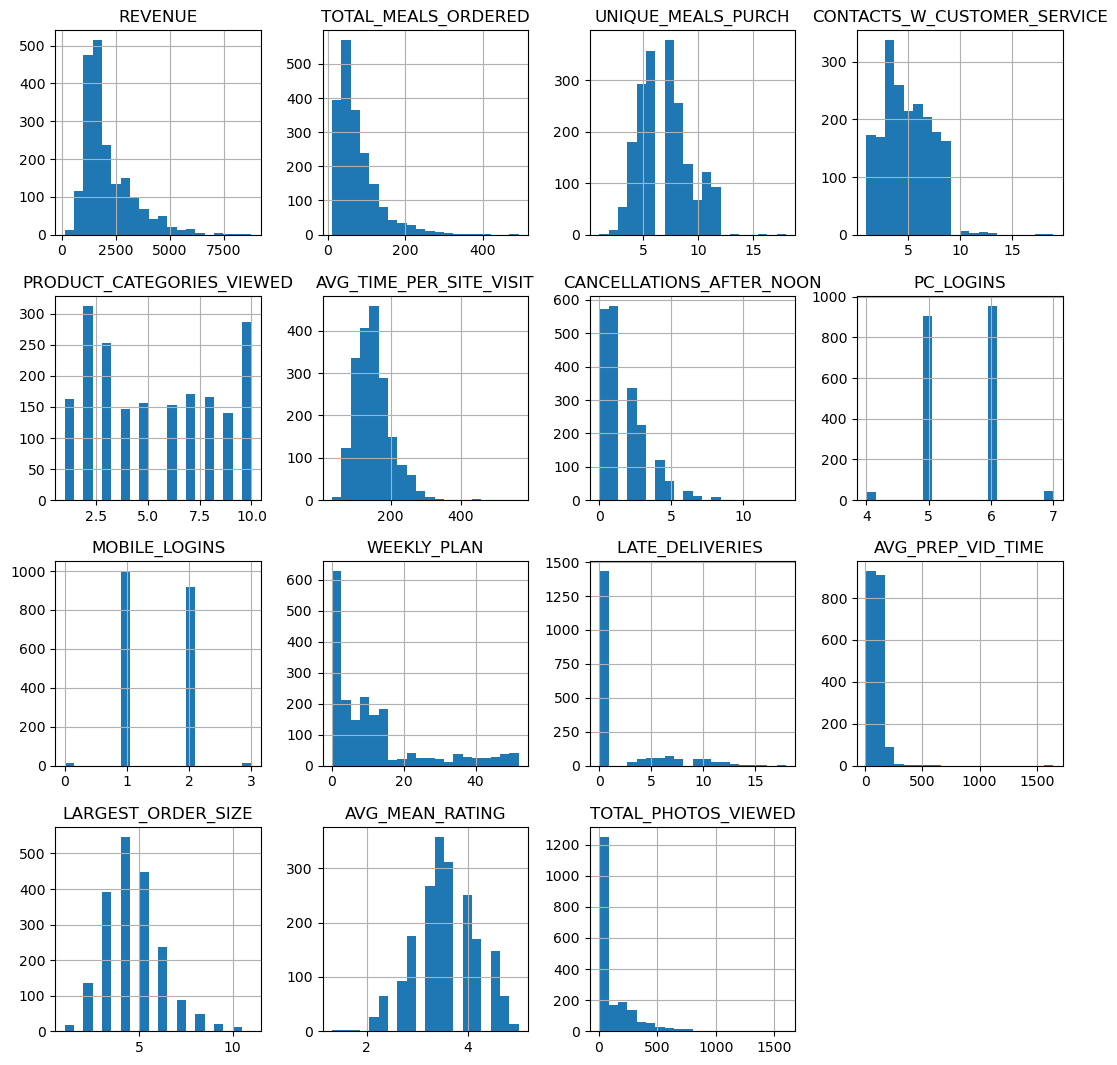

In [7]:
#using histogram to visulaize the numeric data to help identify 
#the continous and interval/count data. This also shows data that are normally distributed
apprentice._get_numeric_data().hist(bins=20, figsize=(13, 13))

### Visuals Observed
The results above show the anomalies in the data set. Some variables are positively skewed, some are negatively skewed others have large amount of zeros. Data transformation is needed to fix the anomalies.

In [8]:
#Grouping the data_type of each original variable in the dataset.

continuous_data = ['REVENUE', #Y-variable
              'AVG_TIME_PER_SITE_VISIT',
              'AVG_PREP_VID_TIME',
              'LARGEST_ORDER_SIZE',
              'AVG_MEAN_RATING',
              'TOTAL_MEALS_ORDERED']

counts_data = ['UNIQUE_MEALS_PURCH',
              'CONTACTS_W_CUSTOMER_SERVICE',
              'PRODUCT_CATEGORIES_VIEWED',
              'CANCELLATIONS_AFTER_NOON',
              'MOBILE_LOGINS',
              'PC_LOGINS',
              'WEEKLY_PLAN',
              'LATE_DELIVERIES',
              'TOTAL_PHOTOS_VIEWED']

categorical_data = ['NAME',
                'EMAIL',
               'FIRST_NAME',
               'FAMILY_NAME']

In [9]:
#checking the skewness for the variables
apprentice.skew().round(decimals = 2)

/var/folders/ts/0xplq4j92sx9kyw_rb5rvxq40000gn/T/ipykernel_7905/4236879198.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  apprentice.skew().round(decimals = 2)


REVENUE                        1.63
TOTAL_MEALS_ORDERED            2.01
UNIQUE_MEALS_PURCH             0.57
CONTACTS_W_CUSTOMER_SERVICE    0.37
PRODUCT_CATEGORIES_VIEWED      0.16
AVG_TIME_PER_SITE_VISIT        1.20
CANCELLATIONS_AFTER_NOON       1.44
PC_LOGINS                     -0.04
MOBILE_LOGINS                  0.05
WEEKLY_PLAN                    1.54
LATE_DELIVERIES                1.71
AVG_PREP_VID_TIME              9.64
LARGEST_ORDER_SIZE             0.70
AVG_MEAN_RATING               -0.11
TOTAL_PHOTOS_VIEWED            2.60
dtype: float64

### Skewness
The result above show there are features that the skewness is above 1. Log transforming features that have skewness above 1 can improve the skewness.

### Missing Values
Imputing UNKNOWN for missing FAMILY_NAME seems to be the right thing to do. This strategy assumes that the reason this data is missing because it was optional for customers to enter their last name when updating their profile.
<a> https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114</a>

In [10]:
#Imputing the missing values for FAMILY_NAME
# instantiating an imputation value in this case, UNKNOWN
fill = 'UNKNOWN'


# imputing 'FAMILY_NAME'
apprentice['FAMILY_NAME'] = apprentice['FAMILY_NAME'].fillna(fill)

In [11]:
#checking if there are still missing values in the FAMILY_NAME column
apprentice['FAMILY_NAME'].isnull().sum()

0

In [12]:
# making sure there are no more missing values in the dataset
apprentice.isnull().any().any()

False

In [13]:
#Using subsetting to check the value counts for all variables that appear to have a large amount of zeros.
# counting the number of zeroes for 
rev_zeroes         = len(apprentice['REVENUE'][apprentice["REVENUE"] == 0]) # REVENUE
tot_mls_ord_zeroes = len(apprentice['TOTAL_MEALS_ORDERED'][apprentice["TOTAL_MEALS_ORDERED"] == 0]) # TOTAL_MEALS_ORDERED 
purch_zeroes       = len(apprentice['UNIQUE_MEALS_PURCH'][apprentice["UNIQUE_MEALS_PURCH"] == 0]) # UNIQUE_MEALS_PURCH 
custservc_zeroes   = len(apprentice['CONTACTS_W_CUSTOMER_SERVICE'][apprentice["CONTACTS_W_CUSTOMER_SERVICE"] == 0]) # CONTACTS_W_CUSTOMER_SERVICE 
pd_cat_zeroes      = len(apprentice['PRODUCT_CATEGORIES_VIEWED'][apprentice["PRODUCT_CATEGORIES_VIEWED"] == 0]) # PRODUCT_CATEGORIES_VIEWED
site_zeroes        = len(apprentice['AVG_TIME_PER_SITE_VISIT'][apprentice["AVG_TIME_PER_SITE_VISIT"] == 0]) # AVG_TIME_PER_SITE_VISIT
cancel_zeroes      = len(apprentice['CANCELLATIONS_AFTER_NOON'][apprentice["CANCELLATIONS_AFTER_NOON"] == 0]) # CANCELLATIONS_AFTER_NOON
pc_login_zeroes    = len(apprentice['PC_LOGINS'][apprentice["PC_LOGINS"] == 0]) # PC_LOGINS 
mb_login_zeroes    = len(apprentice['MOBILE_LOGINS'][apprentice["MOBILE_LOGINS"] == 0]) # MOBILE_LOGINS
plan_zeroes        = len(apprentice['WEEKLY_PLAN'][apprentice["WEEKLY_PLAN"] == 0]) # WEEKLY_PLAN
late_dv_zeroes     = len(apprentice['LATE_DELIVERIES '][apprentice["LATE_DELIVERIES "] == 0]) # LATE_DELIVERIES
vid_tim_zeroes     = len(apprentice['AVG_PREP_VID_TIME'][apprentice["AVG_PREP_VID_TIME"] == 0]) # AVG_PREP_VID_TIME
order_zeroes       = len(apprentice['LARGEST_ORDER_SIZE'][apprentice["LARGEST_ORDER_SIZE"] == 0]) # LARGEST_ORDER_SIZE 
rating_zeroes      = len(apprentice['AVG_MEAN_RATING'][apprentice["AVG_MEAN_RATING"] == 0]) # AVG_MEAN_RATING
photo_zeroes       = len(apprentice['TOTAL_PHOTOS_VIEWED'][apprentice["TOTAL_PHOTOS_VIEWED"] == 0]) # AVG_MEAN_RATING



# printing a table of the results
print(f"""
                 No\t\tYes
               ---------------------
REVENUE              | {rev_zeroes}\t\t{len(apprentice) - rev_zeroes}
TOTAL_MEALS_ORDERED  | {tot_mls_ord_zeroes}\t\t{len(apprentice) - tot_mls_ord_zeroes}
UNIQUE_MEALS_PURCH   | {purch_zeroes}\t\t{len(apprentice) - purch_zeroes}
CUSTOMER_SERVICE     | {custservc_zeroes}\t\t{len(apprentice) - custservc_zeroes}
PRODUCT_CATEGORIE    | {pd_cat_zeroes}\t\t{len(apprentice) - pd_cat_zeroes}
TIME_PER_SITE_VISIT  | {site_zeroes}\t\t{len(apprentice) - site_zeroes}
CANCELLATIONS_AN     | {cancel_zeroes}\t\t{len(apprentice) - cancel_zeroes}
PC_LOGINS            | {pc_login_zeroes}\t\t{len(apprentice) - pc_login_zeroes}
MOBILE_LOGINS        | {mb_login_zeroes}\t\t{len(apprentice) - mb_login_zeroes}
WEEKLY_PLAN          | {plan_zeroes}\t\t{len(apprentice) - plan_zeroes}
LATE_DELIVERIES      | {late_dv_zeroes}\t\t{len(apprentice) - late_dv_zeroes}
PREP_VID_TIME        | {vid_tim_zeroes}\t\t{len(apprentice) - vid_tim_zeroes}
LARGEST_ORDER_SIZE   | {order_zeroes}\t\t{len(apprentice) - order_zeroes}
MEAN_RATING          | {rating_zeroes}\t\t{len(apprentice) - rating_zeroes}
PHOTOS_VIEWED        | {photo_zeroes}\t\t{len(apprentice) - photo_zeroes} """)




                 No		Yes
               ---------------------
REVENUE              | 0		1946
TOTAL_MEALS_ORDERED  | 0		1946
UNIQUE_MEALS_PURCH   | 0		1946
CUSTOMER_SERVICE     | 0		1946
PRODUCT_CATEGORIE    | 0		1946
TIME_PER_SITE_VISIT  | 0		1946
CANCELLATIONS_AN     | 572		1374
PC_LOGINS            | 0		1946
MOBILE_LOGINS        | 16		1930
WEEKLY_PLAN          | 468		1478
LATE_DELIVERIES      | 1433		513
PREP_VID_TIME        | 0		1946
LARGEST_ORDER_SIZE   | 0		1946
MEAN_RATING          | 0		1946
PHOTOS_VIEWED        | 0		1946 


### Data with large amount of zeros
The table above shows that there are 4  columns with large amount of zeros.
1. CANCELLATIONS_AFTER_NOON
2. WEEKLY_PLAN
3. LATE_DELIVERIES 
4. MOBILE_LOGINS.

Zeros affect the skewness. 
Engineering flag features for all variables that have at least 100 observations in both the 'yes' and 'no' columns. 

In [14]:
#Engineering flag features for all variables that have at least 100 observations in both the 'yes' and 'no' columns.
# placeholder variables
apprentice['has_CANCELLATIONS_AFTER_NOON'] = 0
apprentice['has_WEEKLY_PLAN']              = 0
apprentice['has_LATE_DELIVERIES']         = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in apprentice.iterrows():


    # CANCELLATIONS_AFTER_NOON
    if apprentice.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        apprentice.loc[index, 'has_CANCELLATIONS_AFTER_NOON'] = 1
        
        
    # WEEKLY_PLAN
    if apprentice.loc[index, 'WEEKLY_PLAN'] > 0:
        apprentice.loc[index, 'has_WEEKLY_PLAN'] = 1
        
        
    # LATE_DELIVERIES 
    if apprentice.loc[index, 'LATE_DELIVERIES '] > 0:
        apprentice.loc[index, 'has_LATE_DELIVERIES'] = 1
        

In [15]:
#Checking results
apprentice[  ['has_CANCELLATIONS_AFTER_NOON', 'has_WEEKLY_PLAN', 'has_LATE_DELIVERIES']  ].head(n = 5)

,has_CANCELLATIONS_AFTER_NOON,has_WEEKLY_PLAN,has_LATE_DELIVERIES
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0


In [16]:
# creating a (Pearson) correlation matrix
df_corr = apprentice.corr().round(2)


# printing (Pearson) correlations with REVENUE
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                         1.00
AVG_TIME_PER_SITE_VISIT         0.64
TOTAL_MEALS_ORDERED             0.60
TOTAL_PHOTOS_VIEWED             0.46
LARGEST_ORDER_SIZE              0.44
CONTACTS_W_CUSTOMER_SERVICE     0.17
AVG_PREP_VID_TIME               0.14
UNIQUE_MEALS_PURCH              0.10
MOBILE_LOGINS                   0.07
PRODUCT_CATEGORIES_VIEWED       0.03
PC_LOGINS                       0.02
has_CANCELLATIONS_AFTER_NOON    0.01
WEEKLY_PLAN                     0.01
CANCELLATIONS_AFTER_NOON        0.00
LATE_DELIVERIES                -0.02
has_LATE_DELIVERIES            -0.02
has_WEEKLY_PLAN                -0.03
AVG_MEAN_RATING                -0.55
Name: REVENUE, dtype: float64


### Correlation
The results above shows moderate correlation between the X-variables and the Y- Variables. This will result will be used as a guide when building the base model

## Working with continuous data

In [17]:
# creating a list of continuous features (including REVENUE) to see the correlation
continuous_data = ['REVENUE', #Y-variable
                  'AVG_TIME_PER_SITE_VISIT',
                  'AVG_PREP_VID_TIME',
                  'LARGEST_ORDER_SIZE',
                  'AVG_MEAN_RATING',
                  'TOTAL_MEALS_ORDERED']


# developing a correlation matrix based on continuous features
apprentice_corr = apprentice[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
apprentice_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                    1.00
AVG_TIME_PER_SITE_VISIT    0.64
TOTAL_MEALS_ORDERED        0.60
LARGEST_ORDER_SIZE         0.44
AVG_PREP_VID_TIME          0.14
AVG_MEAN_RATING           -0.55
Name: REVENUE, dtype: float64

The result above show a moderate correlation between the continuous data and Y- variable except for AVG_PREP_VID_TIME which has a weak positive correlation.

### Visualizing continuous data using scatter plots
Analyzing scatter plots will help discover trend between two variables and check if the trend is consistent. It will also check for outliers. Outliers could greatly affect our model.

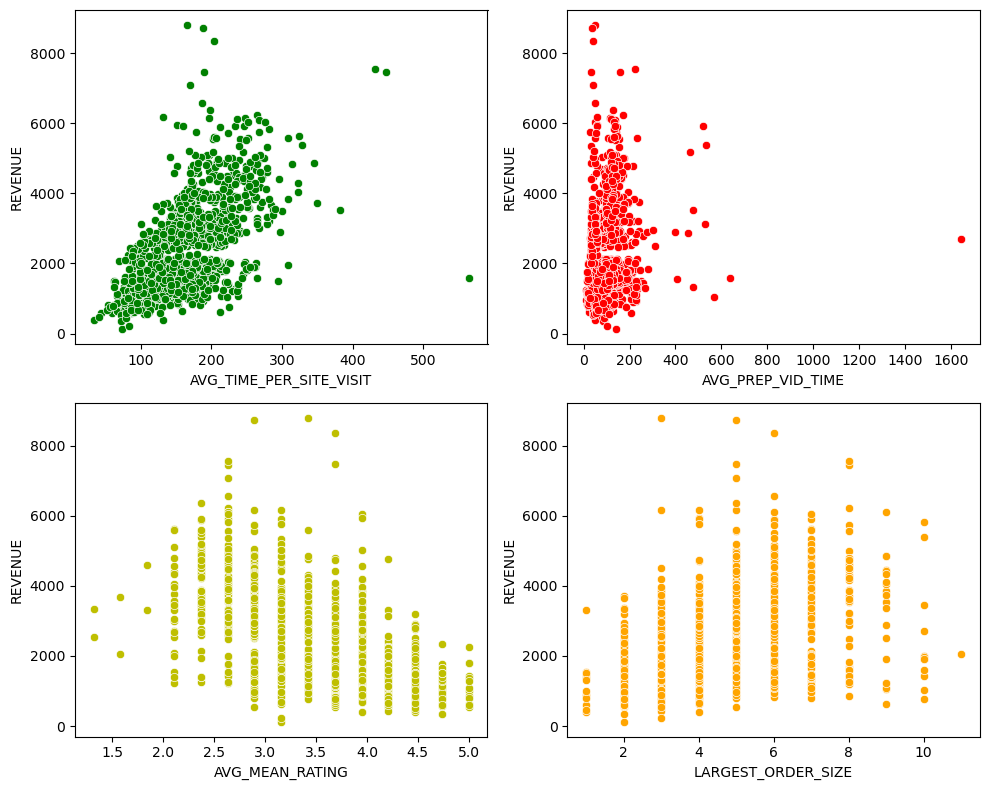

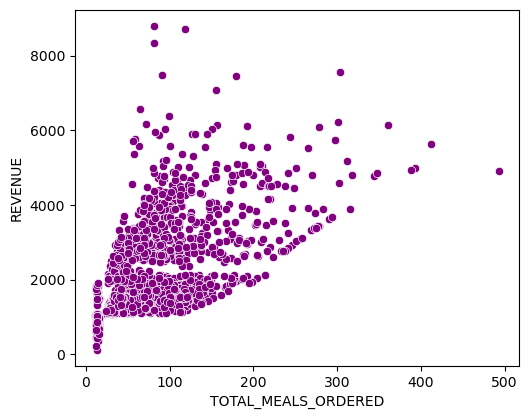

In [18]:
#Developing Trend-Based Features
#Creating some scatter plots between continuous X-variables and REVENUE.

########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['AVG_TIME_PER_SITE_VISIT'],
                y = apprentice['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')



########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['AVG_PREP_VID_TIME'],
                y = apprentice['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')



########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['AVG_MEAN_RATING'],
                y = apprentice['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_MEAN_RATING')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['LARGEST_ORDER_SIZE'],
                y = apprentice['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')

########################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['TOTAL_MEALS_ORDERED'],
                y = apprentice['REVENUE'],
                color = 'purple')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')

#######################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

The results shows that continuous data have outliers that and it's affecting the skewness of the data. 
Log transforming the data will help fix the skewness and improve the relationship between X and Y variable

<a>https://www.r-statistics.com/2013/05/log-transformations-for-skewed-and-wide-distributions-from-practical-data-science-with-r/ ></a>


## Data Preparation

In [19]:
#Logarithmically transforming the continous data 
# log transforming features and saving it to the dataset 

# REVENUE - Y variable
apprentice['log_REVENUE'] = np.log(apprentice['REVENUE']) 

 #AVG_TIME_PER_SITE_VISIT
apprentice['log_AVG_TIME_PER_SITE_VISIT'] = np.log(apprentice['AVG_TIME_PER_SITE_VISIT'])

#AVG_PREP_VID_TIME
apprentice['log_AVG_PREP_VID_TIME'] = np.log(apprentice['AVG_PREP_VID_TIME'])

#AVG_MEAN_RATING
apprentice['log_AVG_MEAN_RATING'] = np.log(apprentice['AVG_MEAN_RATING'])

#LARGEST_ORDER_SIZE
apprentice['log_LARGEST_ORDER_SIZE'] = np.log(apprentice['LARGEST_ORDER_SIZE'])

#TOTAL_MEALS_ORDERED
apprentice['log_TOTAL_MEALS_ORDERED'] = np.log(apprentice['TOTAL_MEALS_ORDERED'])



In [20]:
# creating a list of transformed continuous features (including REVENUE) to see the correlation
continuous_data = ['log_REVENUE', 
                  'log_AVG_TIME_PER_SITE_VISIT',
                  'log_AVG_PREP_VID_TIME',
                  'log_LARGEST_ORDER_SIZE',
                  'log_AVG_MEAN_RATING']

# developing a correlation matrix based on continuous features
apprentice_corr = apprentice[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
apprentice_corr.loc[ : , 'log_REVENUE'].round(decimals = 2).sort_values(ascending = False)

log_REVENUE                    1.00
log_AVG_TIME_PER_SITE_VISIT    0.67
log_LARGEST_ORDER_SIZE         0.45
log_AVG_PREP_VID_TIME          0.15
log_AVG_MEAN_RATING           -0.58
Name: log_REVENUE, dtype: float64

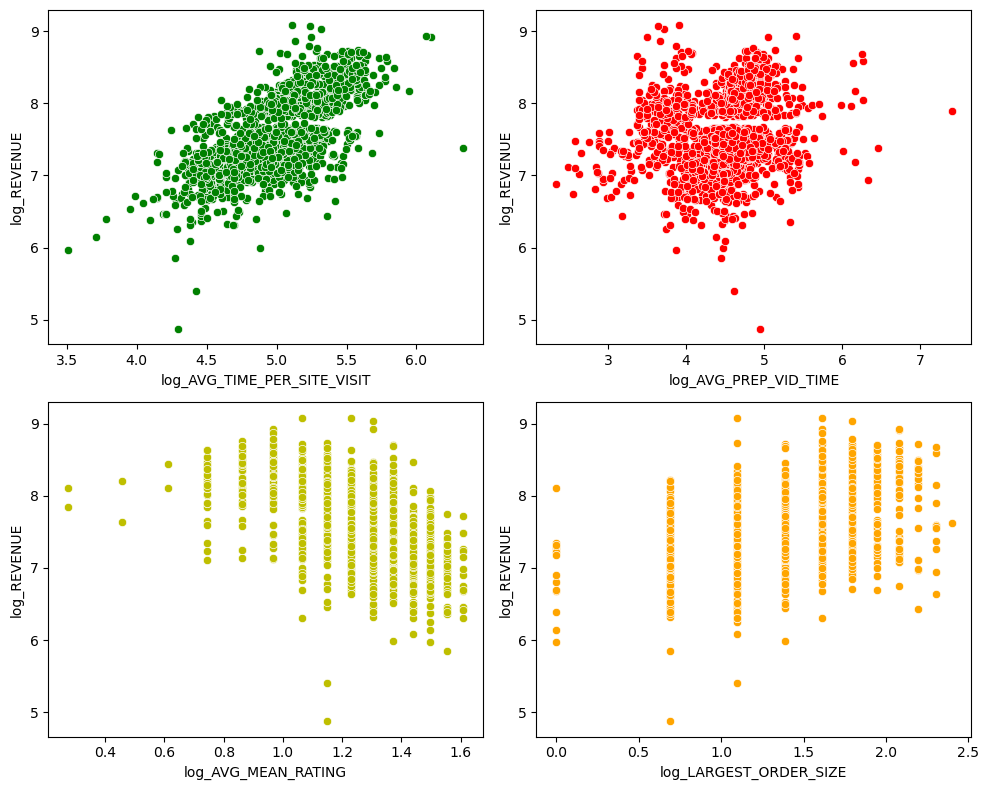

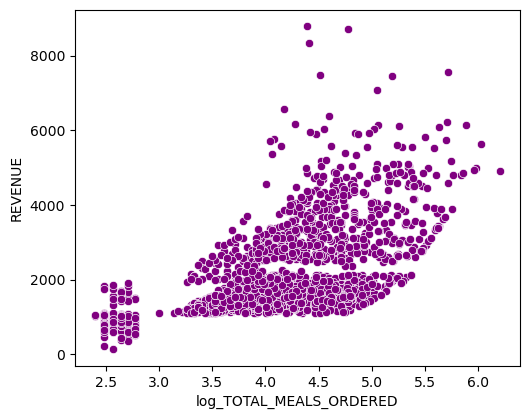

In [21]:
#visualizing results of the transformed continous data

#Developing Trend-Based Features
#Creating some scatter plots between continuous X-variables and REVENUE.

########################
# Visual EDA (Scatterplots)
########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['log_AVG_TIME_PER_SITE_VISIT'],
                y = apprentice['log_REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'log_REVENUE')



########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['log_AVG_PREP_VID_TIME'],
                y = apprentice['log_REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'log_REVENUE')



########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['log_AVG_MEAN_RATING'],
                y = apprentice['log_REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_AVG_MEAN_RATING')
plt.ylabel(ylabel = 'log_REVENUE')



########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['log_LARGEST_ORDER_SIZE'],
                y = apprentice['log_REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'log_REVENUE')

#######################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['log_TOTAL_MEALS_ORDERED'],
                y = apprentice['REVENUE'],
                color = 'purple')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')

#######################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

Transforming the continuous data slightly improved the outliers.
Using a predictive model that reduces the impact of outliers would be ideal for this dataset.

## Working with count/interval data
Visualizing data using box plot to see if there is any linear relationship between X-variable and Y variable or log-Y variable.

If no relationship is visualized, then feature engineering will be necessary to improve the relationship.

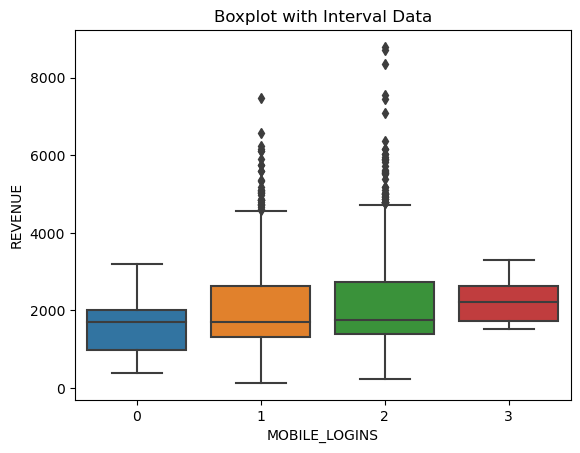

In [22]:
#using boxplots to visualize relationships with interval and count data.

# boxplot - MOBILE_LOGINS and REVENUE
sns.boxplot(x    = 'MOBILE_LOGINS',
            y    = 'REVENUE',
            data = apprentice)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')

# displaying the plot
plt.show()

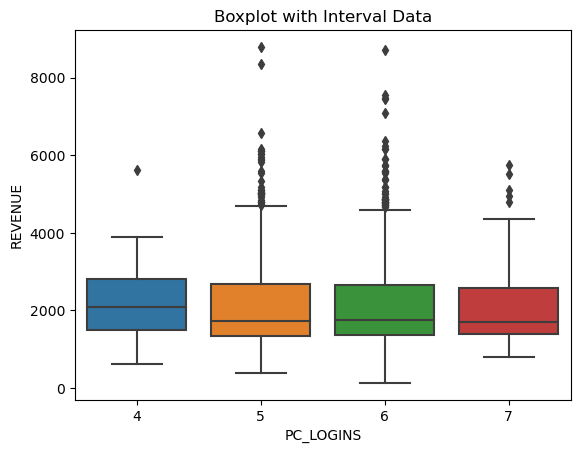

In [23]:
#using boxplots to visualize relationships with interval and count data.
# boxplot - PC_LOGINS and REVENUE
sns.boxplot(x    = 'PC_LOGINS',
            y    = 'REVENUE',
            data = apprentice)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

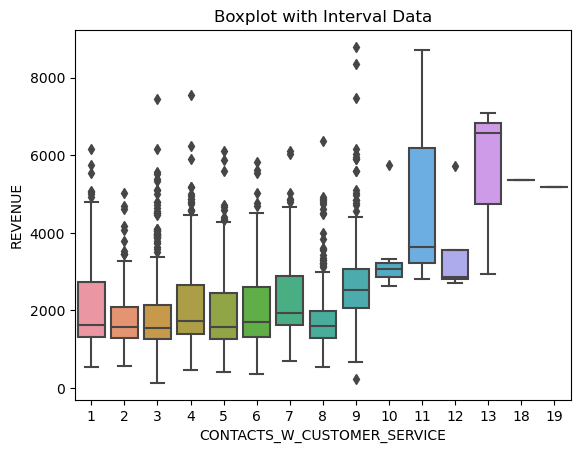

In [24]:
#using boxplots to visualize relationships with interval and count data.
# boxplot - PRODUCT_CATEGORIES_VIEWED and REVENUE
sns.boxplot(x    = 'CONTACTS_W_CUSTOMER_SERVICE',
            y    = 'REVENUE',
            data = apprentice)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')

# displaying the plot
plt.show()

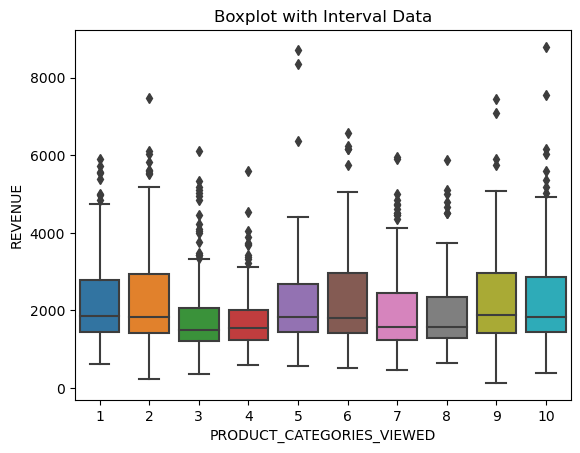

In [25]:
#using boxplots to visualize relationships with interval and count data.
# boxplot - PRODUCT_CATEGORIES_VIEWED and REVENUE
sns.boxplot(x    = 'PRODUCT_CATEGORIES_VIEWED',
            y    = 'REVENUE',
            data = apprentice)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

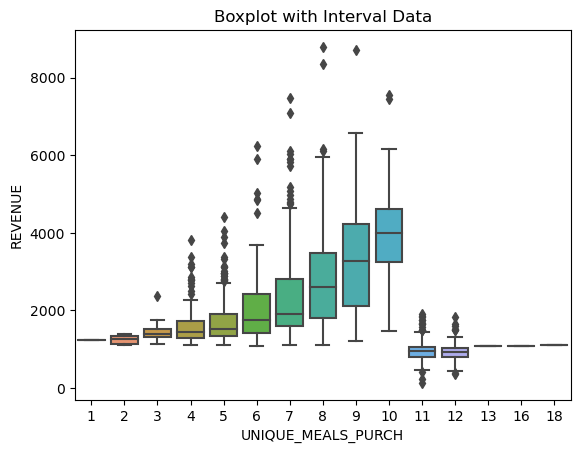

In [26]:
#using boxplots to visualize relationships with interval and count data.
# boxplot - PRODUCT_CATEGORIES_VIEWED and REVENUE
sns.boxplot(x    = 'UNIQUE_MEALS_PURCH',
            y    = 'REVENUE',
            data = apprentice)

# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

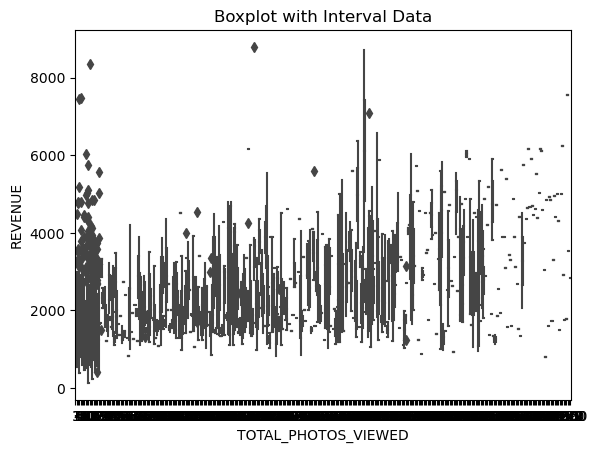

In [27]:
#using boxplots to visualize relationships with interval and count data.
# boxplot - PRODUCT_CATEGORIES_VIEWED and REVENUE
sns.boxplot(x    = 'TOTAL_PHOTOS_VIEWED',
            y    = 'REVENUE',
            data = apprentice)


# titles and axis labels
plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


# displaying the plot
plt.show()

Looking at the box plot, there is no linear relationship between the x and y variables. UNIQUE_MEALS_PURCH seems to have a slight linear relationship, but it looks like a curve at the end.

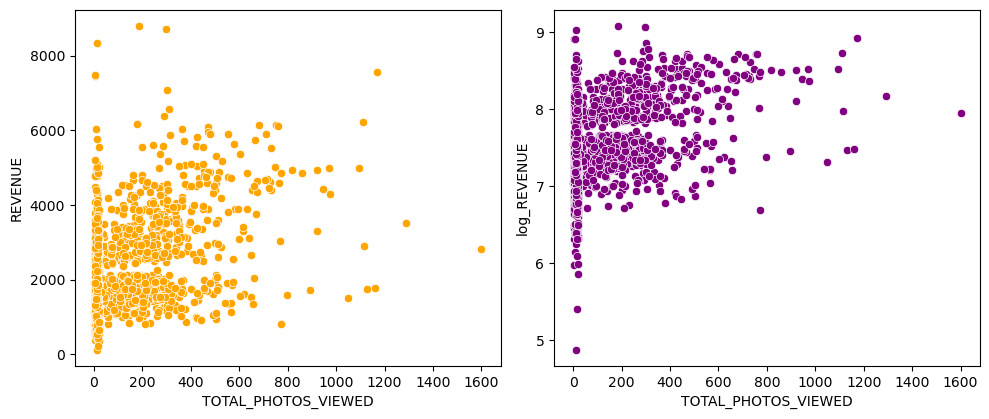

In [28]:
#using scatter plot to visualize relationships with interval and count data.
# PRODUCT_CATEGORIES_VIEWED and REVENUE

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['TOTAL_PHOTOS_VIEWED'],
                y = apprentice['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['TOTAL_PHOTOS_VIEWED'],
                y = apprentice['log_REVENUE'],
                color = 'purple')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'log_REVENUE')

#######################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


TOTAL_PHOTOS_VIEWED seem to have outliers and it's clearer when visualized with scatter plot. Log transformation will be ideal for this feature.

In [29]:
#Logarithmically transforming TOTAL_PHOTOS_VIEWED
apprentice['log_TOTAL_PHOTOS_VIEWED'] = np.log(apprentice['TOTAL_PHOTOS_VIEWED'])


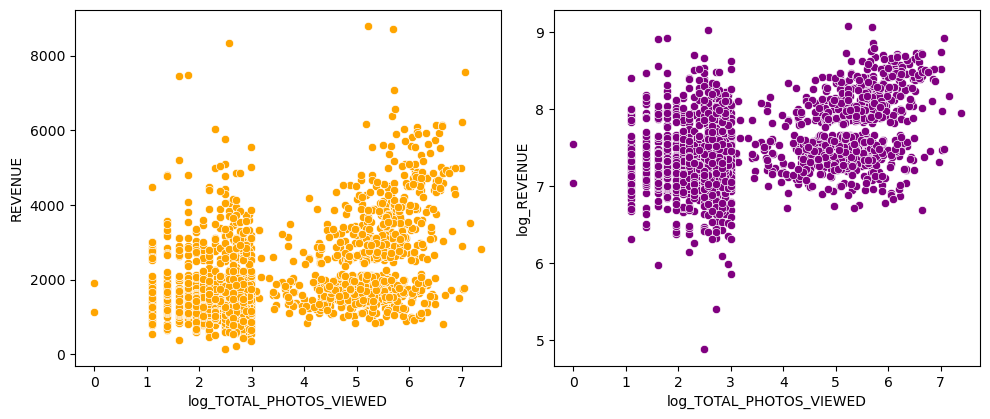

In [30]:
#comparing results
# PRODUCT_CATEGORIES_VIEWED and REVENUE

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['log_TOTAL_PHOTOS_VIEWED'],
                y = apprentice['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['log_TOTAL_PHOTOS_VIEWED'],
                y = apprentice['log_REVENUE'],
                color = 'purple')


# adding labels but not adding title
plt.xlabel(xlabel = 'log_TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'log_REVENUE')

#######################

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

Transforming the result fixed the outliers issue. No further feature engineering is needed

In [31]:
#Logarithmically transforming UNIQUE_MEALS_PURCH
apprentice['log_UNIQUE_MEALS_PURCH'] = np.log(apprentice['UNIQUE_MEALS_PURCH'])

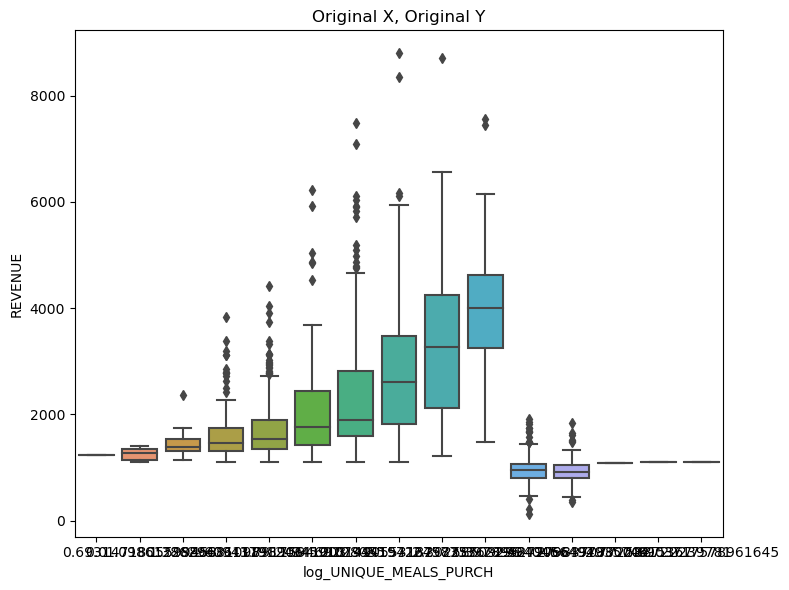

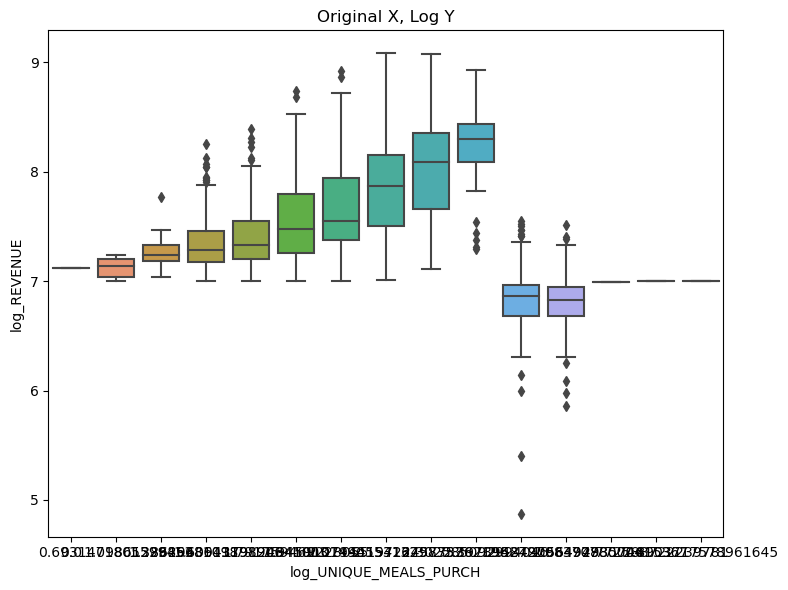

In [32]:

## comparing log Y variable and original y with log_UNIQUE_MEALS_PURCH ##

# setting figure size
fig, ax = plt.subplots(figsize = (8, 6))


## Plot 1: Original X, Original Y ##
sns.boxplot(x     = 'log_UNIQUE_MEALS_PURCH',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'log_UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visual ##
plt.tight_layout()
plt.show()


# setting figure size
fig, ax = plt.subplots(figsize = (8, 6))

## Plot 2: Original X, Log Y ##
sns.boxplot(x     = apprentice['log_UNIQUE_MEALS_PURCH'],
            y     = apprentice['log_REVENUE'],
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'log_UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'log_REVENUE')


## displaying the visual ##
plt.tight_layout()
plt.show()

Comparing with log seemed to have improved the relationship, no further feature engineering needed.

In [33]:
#checking the correlation of the engineered count features above with REVENUE
# developing a small correlation matrix
zeroes_corr = apprentice.corr() #round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['REVENUE',                   # Y-variable
               ['has_CANCELLATIONS_AFTER_NOON', 'has_WEEKLY_PLAN', # X-variables
                'has_LATE_DELIVERIES']] \
                .sort_values(ascending = False)

has_CANCELLATIONS_AFTER_NOON    0.013624
has_LATE_DELIVERIES            -0.019014
has_WEEKLY_PLAN                -0.032196
Name: REVENUE, dtype: float64

In [34]:
#checking the correlation of the engineered count features above with log_REVENUE
# developing a small correlation matrix
zeroes_corr = apprentice.corr() #round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['log_REVENUE',                   # Y-variable
               ['has_CANCELLATIONS_AFTER_NOON', 'has_WEEKLY_PLAN', # X-variables
                'has_LATE_DELIVERIES']] \
                .sort_values(ascending = False)

has_CANCELLATIONS_AFTER_NOON    0.008295
has_LATE_DELIVERIES            -0.027687
has_WEEKLY_PLAN                -0.030929
Name: log_REVENUE, dtype: float64

Only the correlation between between has_LATE_DELIVERIES improved with the log_REVENUE

In [35]:
#CONTACTS_W_CUSTOMER_SERVICE
#Logarithmically transforming TOTAL_PHOTOS_VIEWED
apprentice['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log(apprentice['CONTACTS_W_CUSTOMER_SERVICE'])

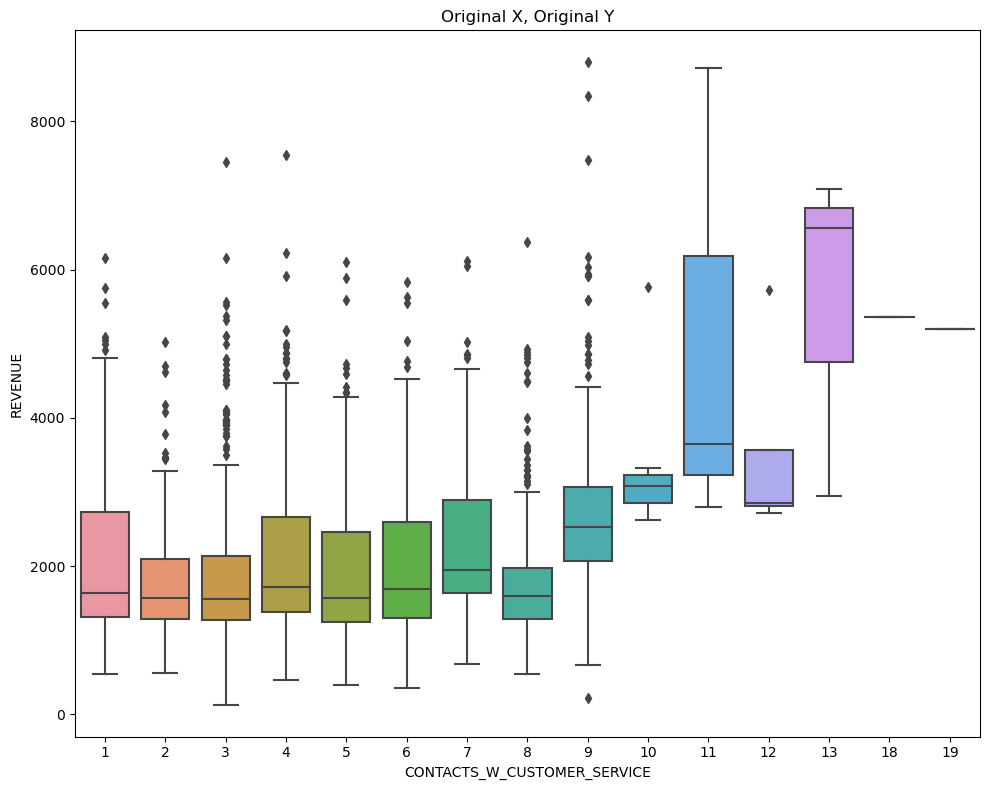

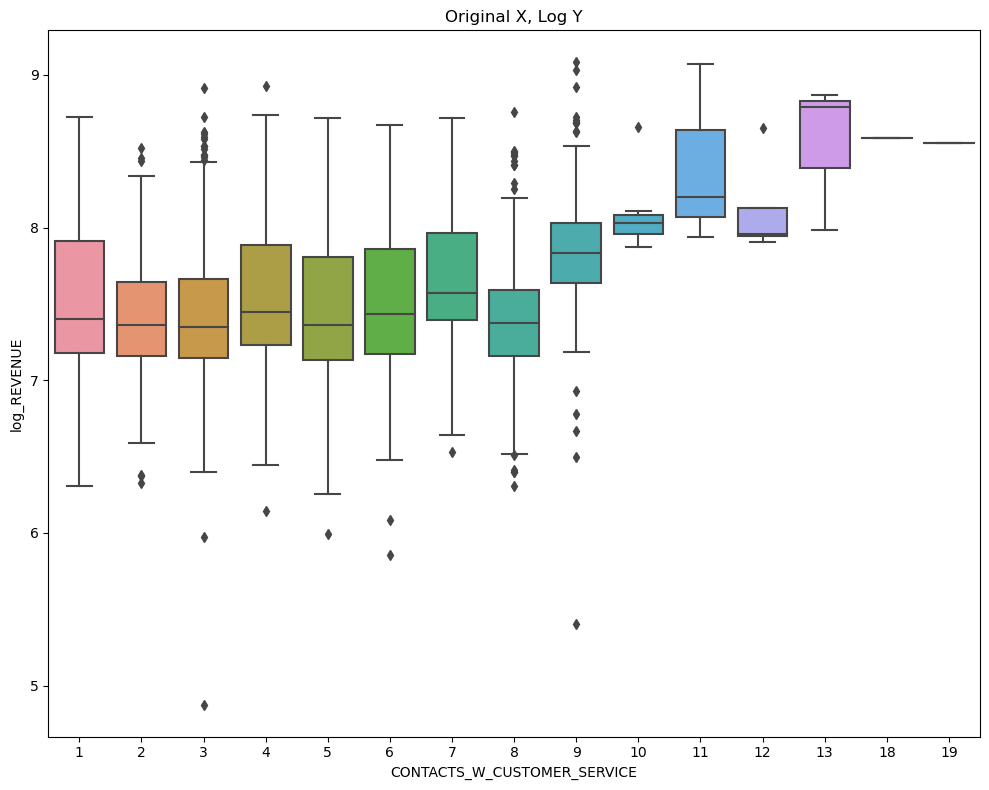

In [36]:
## comparing log Y variable and original y with CONTACTS_W_CUSTOMER_SERVICE ##

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


## Plot 1: Original X, Original Y ##
sns.boxplot(x     = 'CONTACTS_W_CUSTOMER_SERVICE',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visual ##
plt.tight_layout()
plt.show()


# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

## Plot 2: Original X, Log Y ##
sns.boxplot(x     = apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
            y     = apprentice['log_REVENUE'],
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'log_REVENUE')


## displaying the visual ##
plt.tight_layout()
plt.show()

In [37]:
#checking the correlation of CONTACTS_W_CUSTOMER_SERVICE with REVENUE
# developing a small correlation matrix
zeroes_corr = apprentice.corr().round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['REVENUE',                   # Y-variable
               ['CONTACTS_W_CUSTOMER_SERVICE' # X-variables
                ]] \
                .sort_values(ascending = False)

CONTACTS_W_CUSTOMER_SERVICE    0.17
Name: REVENUE, dtype: float64

In [38]:
#checking the correlation CONTACTS_W_CUSTOMER_SERVICE with log_REVENUE
# developing a small correlation matrix
zeroes_corr = apprentice.corr().round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['log_REVENUE',                   # Y-variable
               ['CONTACTS_W_CUSTOMER_SERVICE' # X-variables
                ]] \
                .sort_values(ascending = False)

CONTACTS_W_CUSTOMER_SERVICE    0.18
Name: log_REVENUE, dtype: float64

The log transformation didn't help the relationship. The correlation however, increased when comparing with log_REVENUE

## Engineering new feature
MOBILE_LN_N_CONTACT_W_CS =  apprentice['MOBILE_LOGINS'] + apprentice['CONTACTS_W_CUSTOMER_SERVICE']
This feature assumes that people are comfortable using their phones when they need to complain, they find it more convenient to chat with customer service through their phones. 

In [39]:
#MOBILE_LN_and_PRODUCT_VIEWED
apprentice ['MOBILE_LN_N_CONTACT_W_CS']  = apprentice['CONTACTS_W_CUSTOMER_SERVICE'] + apprentice['MOBILE_LOGINS']

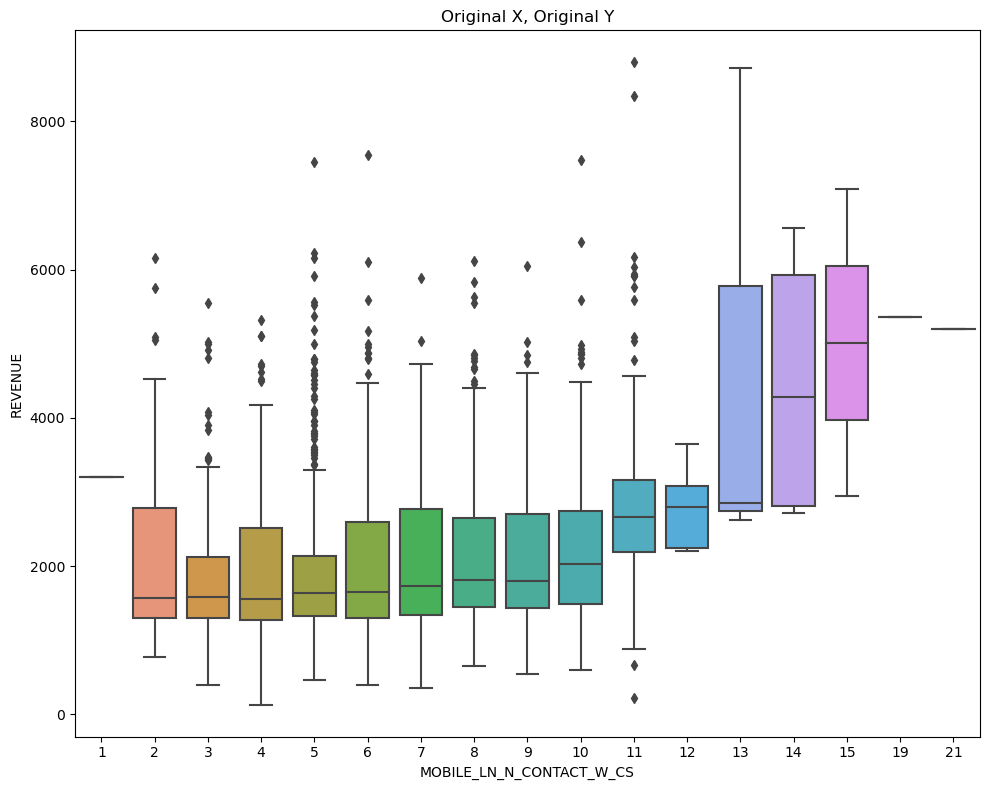

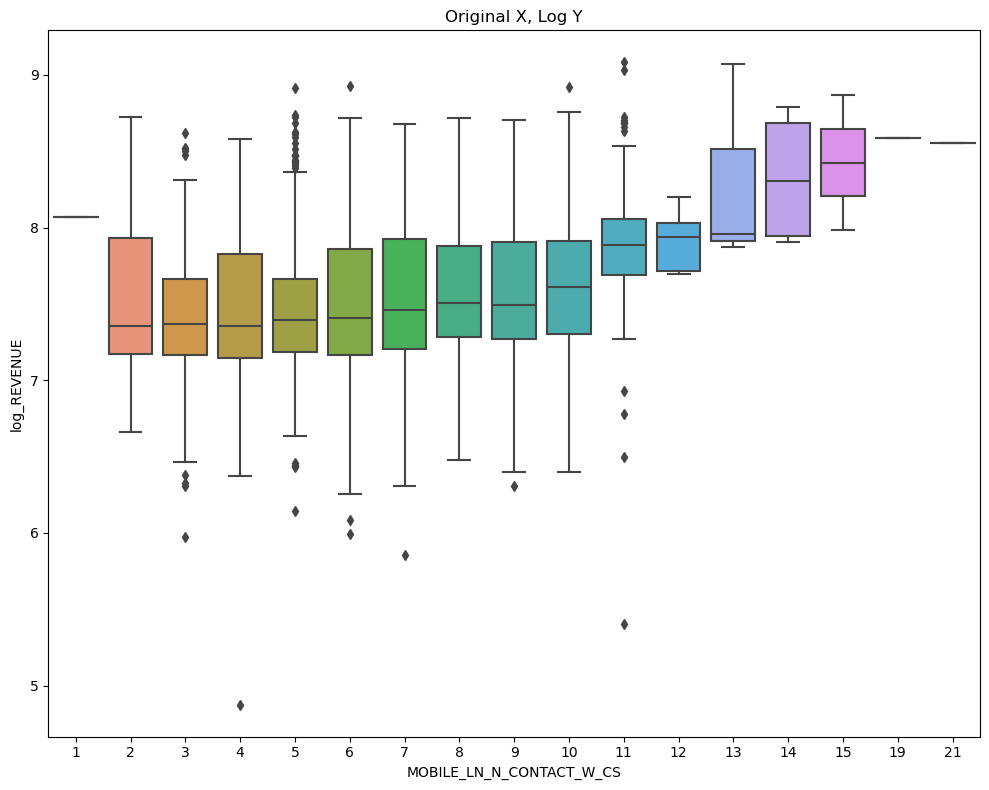

In [40]:
## comparing log Y variable and original y with the new feature ##

# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


## Plot 1: Original X, Original Y ##
sns.boxplot(x     = 'MOBILE_LN_N_CONTACT_W_CS',
            y     = 'REVENUE',
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Original Y')
plt.xlabel(xlabel = 'MOBILE_LN_N_CONTACT_W_CS')
plt.ylabel(ylabel = 'REVENUE')


## displaying the visual ##
plt.tight_layout()
plt.show()


# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))

## Plot 2: Original X, Log Y ##
sns.boxplot(x     = apprentice['MOBILE_LN_N_CONTACT_W_CS'],
            y     = apprentice['log_REVENUE'],
            data  = apprentice)


# titles and labels
plt.title(label   = 'Original X, Log Y')
plt.xlabel(xlabel = 'MOBILE_LN_N_CONTACT_W_CS')
plt.ylabel(ylabel = 'log_REVENUE')


## displaying the visual ##
plt.tight_layout()
plt.show()

In [41]:
#checking the correlation of log_CONTACTS_W_CUSTOMER_SERVICE with REVENUE
# developing a small correlation matrix
zeroes_corr = apprentice.corr() #round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['REVENUE',                   # Y-variable
               ['MOBILE_LN_N_CONTACT_W_CS' # X-variables
                ]] \
                .sort_values(ascending = False)

MOBILE_LN_N_CONTACT_W_CS    0.185939
Name: REVENUE, dtype: float64

In [42]:
#checking the correlation of log_CONTACTS_W_CUSTOMER_SERVICE with REVENUE
# developing a small correlation matrix
zeroes_corr = apprentice.corr() #round(decimals = 2)


# checking the correlations of the newly-created variables with Sale_Price
zeroes_corr.loc['log_REVENUE',                   # Y-variable
               ['MOBILE_LN_N_CONTACT_W_CS' # X-variables
                ]] \
                .sort_values(ascending = False)

MOBILE_LN_N_CONTACT_W_CS    0.191724
Name: log_REVENUE, dtype: float64

## Working with categorical data
Counting the data to determine if the data is large enough to statistically affect our model.

In [43]:
# NAME, EMAIL, FIRST_NAME, FAMILY_NAME
# printing columns
print(f"""
NAME
------
{apprentice['NAME'].value_counts()}


FIRST NAME
----------
{apprentice['FIRST_NAME'].value_counts()}


FAMILY_NAME
-------------
{apprentice['FAMILY_NAME'].value_counts()}

EMAIL
-------------
{apprentice['EMAIL'].value_counts()}
""")


NAME
------
Steffon Baratheon             1
Ormond (knight)               1
Brandon Stark (Shipwright)    1
Beron Blacktyde               1
Ben Bushy                     1
                             ..
Tristifer Botley              1
Garlan Tyrell                 1
Barth (brewer)                1
Draqaz                        1
Anguy                         1
Name: NAME, Length: 1946, dtype: int64


FIRST NAME
----------
Jon        21
Jeyne      14
Aegon      12
Alyn       10
Walder     10
           ..
Igon        1
Iggo        1
Gysella     1
Eleyna      1
Anguy       1
Name: FIRST_NAME, Length: 1442, dtype: int64


FAMILY_NAME
-------------
Frey         79
UNKNOWN      46
Stark        32
Lannister    29
Tyrell       28
             ..
Tumberjon     1
Matt          1
Mullin        1
Myre          1
Anguy         1
Name: FAMILY_NAME, Length: 1071, dtype: int64

EMAIL
-------------
steffon.baratheon@yahoo.com                  1
ormond.(knight)@live.com                     1
brandon.

The sample sizes are large enough however, we will be working with email alone because emails were used to get customer feedback and check for customer's orders. Engineering a feature to split the emails into personal, professional and junk.

In [44]:
# STEP 1: splitting personal emails
# placeholder list
email_lst = []

# looping over each email address
for index, col in apprentice.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice.loc[index, 'EMAIL'].split(sep = "@")
    
    # appending placeholder_lst with the results
    email_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(email_lst)

# safety measure in case of multiple concatenations
apprentice ['EMAIL_DOMAINS'] = email_df[1]


In [45]:
#checking domains
apprentice.head(n=5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,has_CANCELLATIONS_AFTER_NOON,has_WEEKLY_PLAN,has_LATE_DELIVERIES,log_REVENUE,log_AVG_TIME_PER_SITE_VISIT,log_AVG_PREP_VID_TIME,log_AVG_MEAN_RATING,log_LARGEST_ORDER_SIZE,log_TOTAL_MEALS_ORDERED,log_TOTAL_PHOTOS_VIEWED,log_UNIQUE_MEALS_PURCH,log_CONTACTS_W_CUSTOMER_SERVICE,MOBILE_LN_N_CONTACT_W_CS,EMAIL_DOMAINS
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,1,0,0,8.501064,5.581991,4.922969,1.062894,1.791759,6.200509,6.122493,2.197225,0.0,3,yahoo.com
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,1,0,0,8.724207,5.509388,4.789157,0.967584,1.609438,5.888878,6.522093,2.197225,0.0,2,visa.com
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,1,0,8.141772,5.102302,4.844187,1.304056,1.098612,5.627621,4.976734,1.791759,0.0,2,protonmail.com
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,1,0,0,8.110728,5.170484,4.865841,1.149906,1.791759,5.594711,6.035481,2.079442,0.0,3,yahoo.com
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,1,0,8.139586,5.103518,3.538638,1.149906,1.098612,5.620401,5.159055,1.945910,0.0,2,jnj.com


In [46]:
# STEP 2: concatenating with original DataFrame

#instantiating lists of email domains for professional, junk and personal

professional = ['mmm.com', 'amex.com', 'apple.com', 'boeing.com', 'caterpillar.com',
                'chevron.com', 'cisco.com', 'cocacola.com', 'disney.com', 'dupont.com',
                'exxon.com', 'ge.org','goldmansacs.com', 'homedepot.com', 'ibm.com',
                'intel.com','jnj.com', 'jpmorgan.com', 'mcdonalds.com', 'merck.com',
                'microsoft.com', 'nike.com', 'pfizer.com', 'pg.com', 'travelers.com',
                'unitedtech.com', 'unitedhealth.com', 'verizon.com', 'visa.com','walmart.com']

personal =['gmail.com', 'yahoo.com', 'protonmail.com']

junk = ['me.com','aol.com', 'hotmail.com', 'live.com', 'msn.com' , 'passport.com']

#place holder to specify the domains
email_groups = []

#creating for loop to separate the emails into company, individual and spam
for domain in apprentice['EMAIL_DOMAINS']:
    
    if   domain in professional:
        email_groups.append('professional')
        
    elif domain in personal:
        email_groups.append('personal')
        
    elif domain in junk:
        email_groups.append('junk')
    
    else:
        print('not_mail')
        



In [47]:
#converting the list to dataframe
email_groups_df = pd.DataFrame(email_groups)

#creating a new column email_class in the dataset

apprentice['EMAIL_CLASS'] = email_groups_df[0]


In [48]:
# one hot encoding categorical variables
one_hot_email = pd.get_dummies(apprentice['EMAIL_CLASS'])


# dropping categorical variables after they've been encoded
apprentice = apprentice.drop('EMAIL_CLASS', axis = 1)
apprentice = apprentice.drop('EMAIL_DOMAINS', axis = 1)
# joining codes together
apprentice = apprentice.join([one_hot_email])

In [49]:
#checking results
apprentice.head(n=5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,has_CANCELLATIONS_AFTER_NOON,has_WEEKLY_PLAN,has_LATE_DELIVERIES,log_REVENUE,log_AVG_TIME_PER_SITE_VISIT,log_AVG_PREP_VID_TIME,log_AVG_MEAN_RATING,log_LARGEST_ORDER_SIZE,log_TOTAL_MEALS_ORDERED,log_TOTAL_PHOTOS_VIEWED,log_UNIQUE_MEALS_PURCH,log_CONTACTS_W_CUSTOMER_SERVICE,MOBILE_LN_N_CONTACT_W_CS,junk,personal,professional
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,1,0,0,8.501064,5.581991,4.922969,1.062894,1.791759,6.200509,6.122493,2.197225,0.0,3,0,1,0
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,1,0,0,8.724207,5.509388,4.789157,0.967584,1.609438,5.888878,6.522093,2.197225,0.0,2,0,0,1
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,1,0,8.141772,5.102302,4.844187,1.304056,1.098612,5.627621,4.976734,1.791759,0.0,2,0,1,0
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,1,0,0,8.110728,5.170484,4.865841,1.149906,1.791759,5.594711,6.035481,2.079442,0.0,3,0,1,0
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,1,0,8.139586,5.103518,3.538638,1.149906,1.098612,5.620401,5.159055,1.945910,0.0,2,0,0,1


### New categorical feature
apprentice['REAL_MAILS'] = apprentice['professional'] + apprentice['personal']
Apprentice Chef uses customer's email to get feedback on their food and services. This feedback will help them improve their service leading to customer satisfaction and retention which is good for revenue. Taking out the junk emails makes sure that the email is sent to a person or a company.

In [50]:
#Creating new feature with the sum of personal and professional emails
apprentice['REAL_MAILS'] = apprentice['professional'] + apprentice['personal']

In [51]:
#Creating a new column for LATE_DELIVERIES to get rid of the space in the column name
apprentice['late_deliveries'] = apprentice['LATE_DELIVERIES ']

# Building Models

Using Pearson correlations to analyze X variables with the Y-variable(s).

In [52]:
# creating a (Pearson) correlation matrix
df_corr = apprentice.corr().round(2)


# printing (Pearson) correlations with SalePrice
df_corr.loc[ : , ['REVENUE', 'log_REVENUE'] ].sort_values(by = 'log_REVENUE',
                                                                ascending = False)

,REVENUE,log_REVENUE
log_REVENUE,0.95,1.00
REVENUE,1.00,0.95
log_TOTAL_MEALS_ORDERED,0.61,0.69
log_AVG_TIME_PER_SITE_VISIT,0.63,0.67
AVG_TIME_PER_SITE_VISIT,0.64,0.65
TOTAL_MEALS_ORDERED,0.60,0.61
log_LARGEST_ORDER_SIZE,0.42,0.45
LARGEST_ORDER_SIZE,0.44,0.45
TOTAL_PHOTOS_VIEWED,0.46,0.43
log_TOTAL_PHOTOS_VIEWED,0.42,0.42


In [53]:
#printing all the columns to see the original and engineered features.
for column in apprentice:
    print(column)


REVENUE
NAME
EMAIL
FIRST_NAME
FAMILY_NAME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES 
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED
has_CANCELLATIONS_AFTER_NOON
has_WEEKLY_PLAN
has_LATE_DELIVERIES
log_REVENUE
log_AVG_TIME_PER_SITE_VISIT
log_AVG_PREP_VID_TIME
log_AVG_MEAN_RATING
log_LARGEST_ORDER_SIZE
log_TOTAL_MEALS_ORDERED
log_TOTAL_PHOTOS_VIEWED
log_UNIQUE_MEALS_PURCH
log_CONTACTS_W_CUSTOMER_SERVICE
MOBILE_LN_N_CONTACT_W_CS
junk
personal
professional
REAL_MAILS
late_deliveries


## Base Model


In [54]:
#Building a base model with the original X-variables
#Developing an optimal linear model using original x-variable.
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """ REVENUE ~  TOTAL_MEALS_ORDERED +
                                            UNIQUE_MEALS_PURCH +
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            PRODUCT_CATEGORIES_VIEWED +
                                            AVG_TIME_PER_SITE_VISIT +
                                            CANCELLATIONS_AFTER_NOON +
                                            PC_LOGINS +
                                            MOBILE_LOGINS +
                                            WEEKLY_PLAN +
                                            late_deliveries +
                                            AVG_PREP_VID_TIME +
                                            LARGEST_ORDER_SIZE +
                                            AVG_MEAN_RATING +
                                            TOTAL_PHOTOS_VIEWED 
                                      

                                                     """,
                                data = apprentice)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     232.7
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:51:10   Log-Likelihood:                -15494.
No. Observations:                1946   AIC:                         3.102e+04
Df Residuals:                    1931   BIC:                         3.110e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### OLS observation of the original X-variable

The R-squared value of 0.628 indicates that 62.8% of the variation in the dependent variable (revenue) is explained by the independent variables in the model. The F-statistics is low with a few insignificant features. 

The coefficients of some of the independent variables have a significant impact on revenue. The p-value of TOTAL_MEALS_ORDERED, UNIQUE_MEALS_PURCH, CONTACTS_W_CUSTOMER_SERVICE, AVG_TIME_PER_SITE_VISIT, MOBILE_LOGINS, LARGEST_ORDER_SIZE, AVG_MEAN_RATING, and TOTAL_PHOTOS_VIEWED are all statistically significant at a significance level of 0.05. These coefficients indicate that as the values of these independent variables increase, the revenue also increases. 

## Full Model


In [55]:
#Building a base model using all the variables including the transformed and new feature engineered model
#Developing an optimal linear model using more than one continuous x-variable.

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """ REVENUE ~  TOTAL_MEALS_ORDERED +
                                            UNIQUE_MEALS_PURCH +
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            PRODUCT_CATEGORIES_VIEWED +
                                            AVG_TIME_PER_SITE_VISIT +
                                            CANCELLATIONS_AFTER_NOON +
                                            PC_LOGINS +
                                            MOBILE_LOGINS +
                                            WEEKLY_PLAN +
                                            late_deliveries +
                                            AVG_PREP_VID_TIME +
                                            LARGEST_ORDER_SIZE +
                                            AVG_MEAN_RATING +
                                            TOTAL_PHOTOS_VIEWED +
                                            has_CANCELLATIONS_AFTER_NOON +
                                            has_WEEKLY_PLAN +
                                            has_LATE_DELIVERIES +
                                            log_AVG_TIME_PER_SITE_VISIT +
                                            log_AVG_PREP_VID_TIME +
                                            log_AVG_MEAN_RATING +
                                            log_LARGEST_ORDER_SIZE +
                                            log_TOTAL_MEALS_ORDERED +
                                            log_TOTAL_PHOTOS_VIEWED +
                                            log_UNIQUE_MEALS_PURCH +
                                            log_CONTACTS_W_CUSTOMER_SERVICE +
                                            MOBILE_LN_N_CONTACT_W_CS +
                                            junk +
                                            personal +
                                            professional +
                                            REAL_MAILS 



                                                     """,
                                data = apprentice)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     143.0
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:51:10   Log-Likelihood:                -15382.
No. Observations:                1946   AIC:                         3.082e+04
Df Residuals:                    1918   BIC:                         3.098e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

The results of the OLS regression model show that several variables have a significant impact on the revenue. The model has a high R-squared value of 0.693, indicating that the variables included in the model explain 69.3% of the variance in revenue. The A very low F-statistics, there are many insignificant variables in the model. 



## Fitted Model
The fitted model has only the significance variables from the full model. This model will be a guide for the predictive model.

In [56]:
#Developing an optimal linear model using more than one continuous x-variable.

# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula =  """ log_REVENUE ~  LARGEST_ORDER_SIZE +
                                                log_AVG_TIME_PER_SITE_VISIT +
                                                log_AVG_PREP_VID_TIME +
                                                log_AVG_MEAN_RATING +
                                                log_TOTAL_MEALS_ORDERED +
                                                log_TOTAL_PHOTOS_VIEWED +
                                                log_UNIQUE_MEALS_PURCH +
                                                MOBILE_LN_N_CONTACT_W_CS +
                                                junk +
                                                personal +
                                                professional +
                                                REAL_MAILS 
                                                 

                                               
                                                 """,
                                data = apprentice)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     439.6
Date:                Tue, 21 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:51:10   Log-Likelihood:                -209.98
No. Observations:                1946   AIC:                             442.0
Df Residuals:                    1935   BIC:                             503.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

### OLS observation of the fitted model: 
The R-squared value is 0.694, which means that the independent variables can explain approximately 69.4% of the variation in the dependent variable in the model.

The F-statistic is 439.6 with a corresponding p-value of 0.00, suggests that the that the overall model is statistically significant.

The AIC (Akaike Information Criterion) value is 442.0, and the BIC (Bayesian Information Criterion) value is 503.3. These are measures of the quality of the model, with lower values indicating a better fit.

In this model, all independent variables have p-values less than 0.05, meaning they are statistically significant.

# Building a Predictive Model
(Wasserstein & Lazar, 2016) and  (van Doorn et al., 2021) explains that some predictive models do not use p-values. Instead, they use alternative measures, such as confidence intervals, Bayesian methods, sensitivity, and specificity  to better communicate the results of statistical analysis.  Based on this, the X variables prepared for the predictive test was randomly selected.

In [57]:

# x-variables for normal y
x_var = [   'TOTAL_MEALS_ORDERED',
            'UNIQUE_MEALS_PURCH',
            'CONTACTS_W_CUSTOMER_SERVICE',
            'PRODUCT_CATEGORIES_VIEWED',
            'AVG_TIME_PER_SITE_VISIT',
            'CANCELLATIONS_AFTER_NOON',
            'PC_LOGINS',
            'MOBILE_LOGINS',
            'WEEKLY_PLAN',
            'late_deliveries',
            'AVG_PREP_VID_TIME',
            'LARGEST_ORDER_SIZE',
            'AVG_MEAN_RATING',
            'TOTAL_PHOTOS_VIEWED' ]

# x-variables for log y
x_var_log_y = [ 'has_LATE_DELIVERIES',
                'log_AVG_TIME_PER_SITE_VISIT',
                'log_AVG_PREP_VID_TIME',
                'log_AVG_MEAN_RATING',
                'log_LARGEST_ORDER_SIZE',
                'log_TOTAL_MEALS_ORDERED',
                'PRODUCT_CATEGORIES_VIEWED',
                'TOTAL_PHOTOS_VIEWED',
                'log_UNIQUE_MEALS_PURCH',
                'MOBILE_LN_N_CONTACT_W_CS',
                'PC_LOGINS',
                'REAL_MAILS',
                'has_CANCELLATIONS_AFTER_NOON',
                'has_WEEKLY_PLAN']

In [58]:
###### preparing for scikit-learn

# Preparing a DataFrame based the the analysis above
#x_data = apprentice.loc[ : , x_var]
x_data = apprentice.loc[ : , x_var_log_y ]


# preparing response variable
#y_data      = apprentice.loc[ : , 'REVENUE']
y_data  = apprentice.loc[ : , 'log_REVENUE']


#################################
## setting up train-test split ##
#################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, # x-variables (can change this)
            y_data, # y-variable  (can change this)
            test_size    = 0.25,
            random_state = 219)

In [76]:
print(x_train.columns)

Index(['has_LATE_DELIVERIES', 'log_AVG_TIME_PER_SITE_VISIT', 'log_AVG_PREP_VID_TIME', 'log_AVG_MEAN_RATING', 'log_LARGEST_ORDER_SIZE', 'log_TOTAL_MEALS_ORDERED', 'PRODUCT_CATEGORIES_VIEWED', 'TOTAL_PHOTOS_VIEWED', 'log_UNIQUE_MEALS_PURCH', 'MOBILE_LN_N_CONTACT_W_CS', 'PC_LOGINS', 'REAL_MAILS', 'has_CANCELLATIONS_AFTER_NOON', 'has_WEEKLY_PLAN'], dtype='object')


In [59]:
# Setting a model name
model_name = "Linear Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6906
Testing Score  : 0.6946
Train-Test Gap : 0.004


In [60]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', 3.72)
('has_LATE_DELIVERIES', -0.01)
('log_AVG_TIME_PER_SITE_VISIT', 0.66)
('log_AVG_PREP_VID_TIME', -0.04)
('log_AVG_MEAN_RATING', -0.44)
('log_LARGEST_ORDER_SIZE', -0.17)
('log_TOTAL_MEALS_ORDERED', 0.29)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_UNIQUE_MEALS_PURCH', 0.12)
('MOBILE_LN_N_CONTACT_W_CS', 0.03)
('PC_LOGINS', -0.01)
('REAL_MAILS', 0.01)
('has_CANCELLATIONS_AFTER_NOON', 0.01)
('has_WEEKLY_PLAN', -0.04)


In [61]:
# dynamically printing results
ols_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ols_model)

Model Name:     Linear Regression
Train_Score:    0.6906
Test_Score:     0.6946
Train-Test Gap: 0.004

Coefficents
-----------
                         Feature  Coefficient
0                      intercept         3.72
1            has_LATE_DELIVERIES        -0.01
2    log_AVG_TIME_PER_SITE_VISIT         0.66
3          log_AVG_PREP_VID_TIME        -0.04
4            log_AVG_MEAN_RATING        -0.44
5         log_LARGEST_ORDER_SIZE        -0.17
6        log_TOTAL_MEALS_ORDERED         0.29
7      PRODUCT_CATEGORIES_VIEWED         0.00
8            TOTAL_PHOTOS_VIEWED         0.00
9         log_UNIQUE_MEALS_PURCH         0.12
10      MOBILE_LN_N_CONTACT_W_CS         0.03
11                     PC_LOGINS        -0.01
12                    REAL_MAILS         0.01
13  has_CANCELLATIONS_AFTER_NOON         0.01
14               has_WEEKLY_PLAN        -0.04


In [62]:
# Setting a model name
model_name = "Lasso Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Lasso()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.1819
Testing Score  : 0.1772
Train-Test Gap : 0.0047


In [63]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', 7.39)
('has_LATE_DELIVERIES', -0.0)
('log_AVG_TIME_PER_SITE_VISIT', 0.0)
('log_AVG_PREP_VID_TIME', 0.0)
('log_AVG_MEAN_RATING', -0.0)
('log_LARGEST_ORDER_SIZE', 0.0)
('log_TOTAL_MEALS_ORDERED', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_UNIQUE_MEALS_PURCH', -0.0)
('MOBILE_LN_N_CONTACT_W_CS', 0.0)
('PC_LOGINS', -0.0)
('REAL_MAILS', 0.0)
('has_CANCELLATIONS_AFTER_NOON', 0.0)
('has_WEEKLY_PLAN', -0.0)


In [64]:
# dynamically printing results
lasso_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(lasso_model)

Model Name:     Lasso Regression
Train_Score:    0.1819
Test_Score:     0.1772
Train-Test Gap: 0.0047

Coefficents
-----------
                         Feature  Coefficient
0                      intercept         7.39
1            has_LATE_DELIVERIES        -0.00
2    log_AVG_TIME_PER_SITE_VISIT         0.00
3          log_AVG_PREP_VID_TIME         0.00
4            log_AVG_MEAN_RATING        -0.00
5         log_LARGEST_ORDER_SIZE         0.00
6        log_TOTAL_MEALS_ORDERED         0.00
7      PRODUCT_CATEGORIES_VIEWED         0.00
8            TOTAL_PHOTOS_VIEWED         0.00
9         log_UNIQUE_MEALS_PURCH        -0.00
10      MOBILE_LN_N_CONTACT_W_CS         0.00
11                     PC_LOGINS        -0.00
12                    REAL_MAILS         0.00
13  has_CANCELLATIONS_AFTER_NOON         0.00
14               has_WEEKLY_PLAN        -0.00


In [65]:
# Setting a model name
model_name = "ARD Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.ARDRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.6833
Testing Score  : 0.6879
Train-Test Gap : 0.0046


In [66]:
# dynamically printing results
ard_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ard_model)

Model Name:     ARD Regression
Train_Score:    0.6833
Test_Score:     0.6879
Train-Test Gap: 0.0046

Coefficents
-----------
                         Feature  Coefficient
0                      intercept         7.39
1            has_LATE_DELIVERIES        -0.00
2    log_AVG_TIME_PER_SITE_VISIT         0.00
3          log_AVG_PREP_VID_TIME         0.00
4            log_AVG_MEAN_RATING        -0.00
5         log_LARGEST_ORDER_SIZE         0.00
6        log_TOTAL_MEALS_ORDERED         0.00
7      PRODUCT_CATEGORIES_VIEWED         0.00
8            TOTAL_PHOTOS_VIEWED         0.00
9         log_UNIQUE_MEALS_PURCH        -0.00
10      MOBILE_LN_N_CONTACT_W_CS         0.00
11                     PC_LOGINS        -0.00
12                    REAL_MAILS         0.00
13  has_CANCELLATIONS_AFTER_NOON         0.00
14               has_WEEKLY_PLAN        -0.00


In [67]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [68]:
model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 1.0
Testing Score  : 0.5554
Train-Test Gap : 0.4446


In [69]:
# specifying a model name
model_name = 'Unpruned GBM'


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss          = 'squared_error',
                                  learning_rate = 0.1,
                                  n_estimators  = 100,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 5,
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.9553
Testing Score  : 0.8017
Train-Test Gap : 0.1536


In [70]:
model_name = 'Pruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor(max_depth          = 5,
                              min_samples_leaf   = 25,
                              random_state       = 219)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7408
Testing Score  : 0.6947
Train-Test Gap : 0.0461


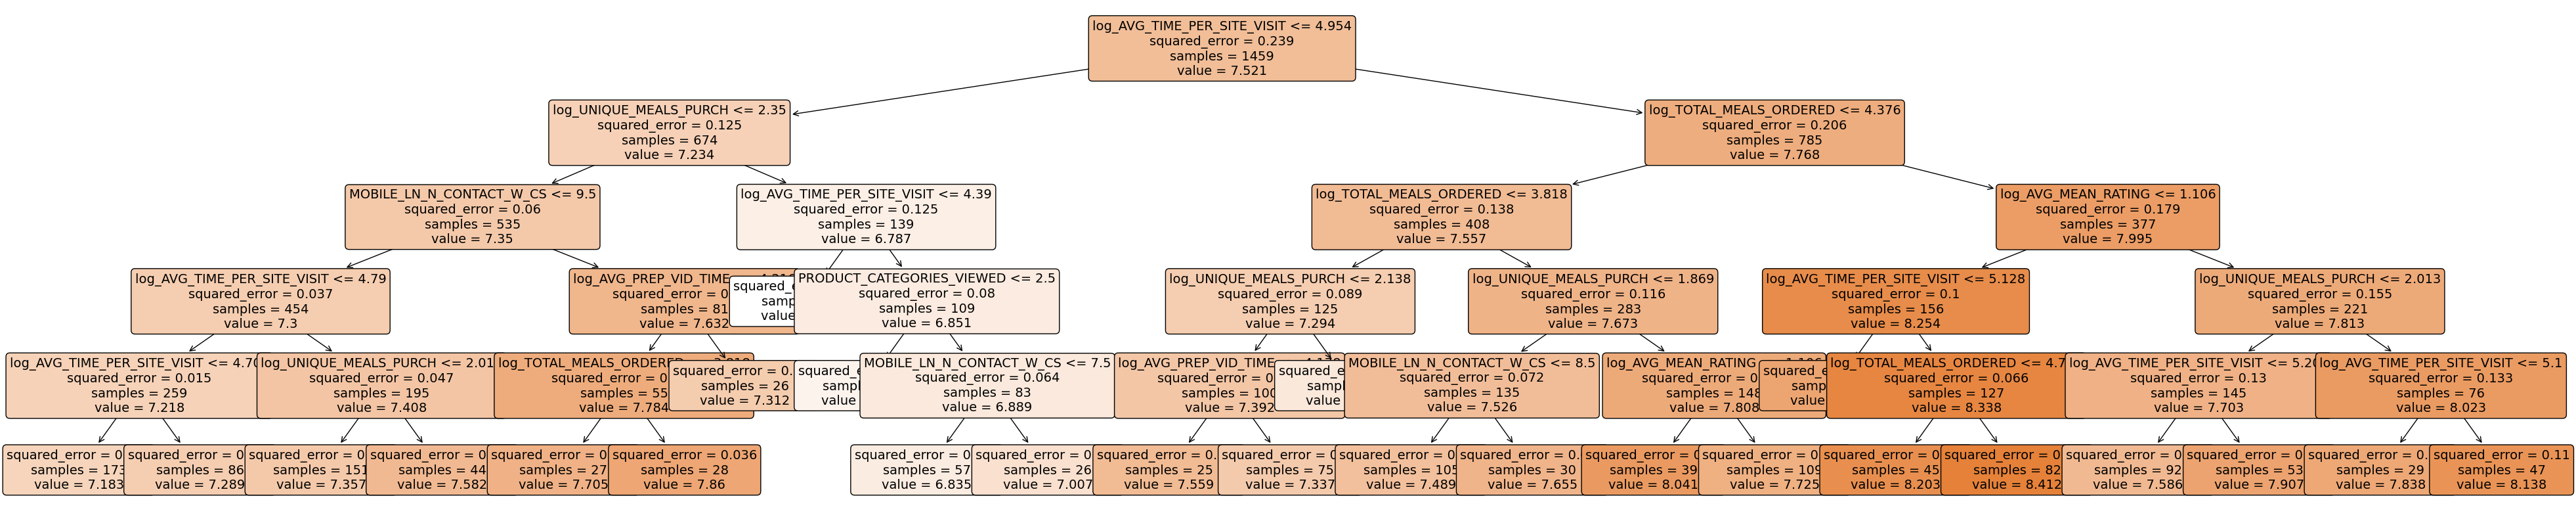

In [71]:
# setting figure size
plt.figure(figsize=(50, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = model, # changing to pruned_tree_fit
          feature_names = x_train.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

# The Best Performing Model (Pruned Random Forest)

In [72]:
# specifying a model name
model_name = 'Pruned Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100,
                              criterion        = 'squared_error',
                              max_depth        = 8,
                              min_samples_leaf = 14,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8235
Testing Score  : 0.7793
Train-Test Gap : 0.0442


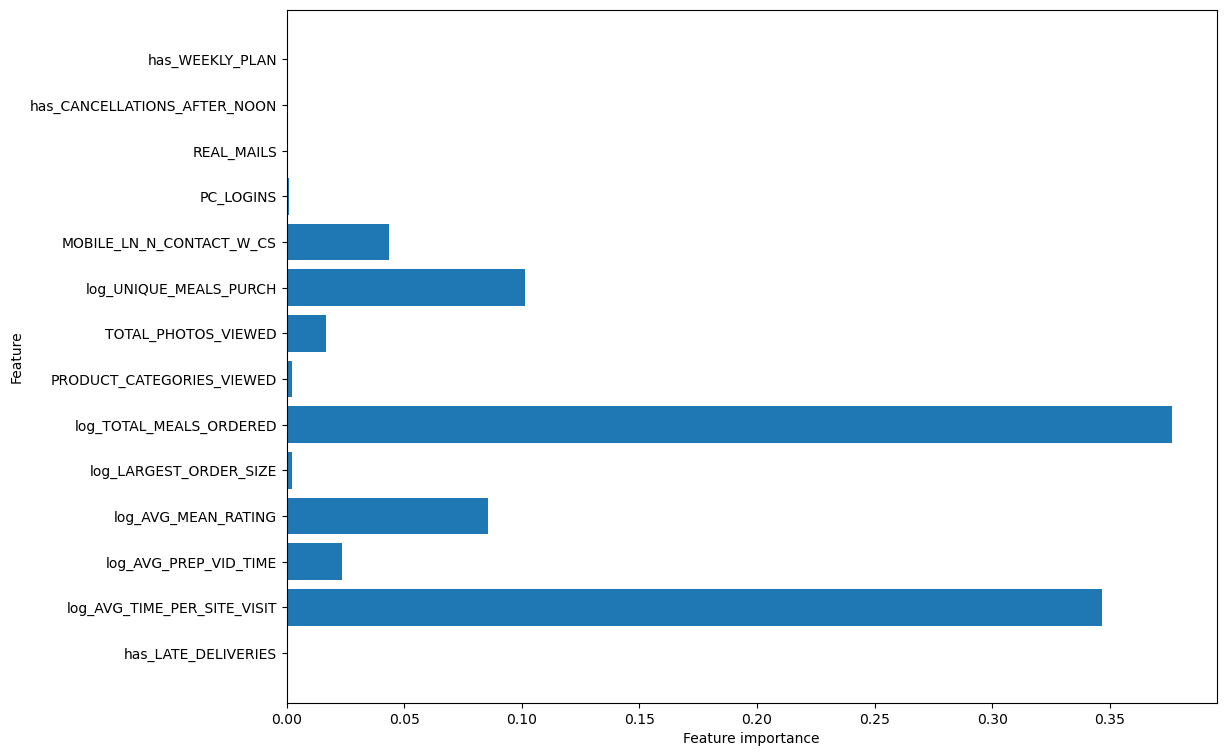

In [73]:
# plotting feature importance
plot_feature_importances(model          ,
                         train = x_train,
                         export = False )

In [74]:
# dynamically printing results
Pruned_random_forest_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(Pruned_random_forest_model)

Model Name:     Pruned Random Forest
Train_Score:    0.8235
Test_Score:     0.7793
Train-Test Gap: 0.0442

Coefficents
-----------
                         Feature  Coefficient
0                      intercept         7.39
1            has_LATE_DELIVERIES        -0.00
2    log_AVG_TIME_PER_SITE_VISIT         0.00
3          log_AVG_PREP_VID_TIME         0.00
4            log_AVG_MEAN_RATING        -0.00
5         log_LARGEST_ORDER_SIZE         0.00
6        log_TOTAL_MEALS_ORDERED         0.00
7      PRODUCT_CATEGORIES_VIEWED         0.00
8            TOTAL_PHOTOS_VIEWED         0.00
9         log_UNIQUE_MEALS_PURCH        -0.00
10      MOBILE_LN_N_CONTACT_W_CS         0.00
11                     PC_LOGINS        -0.00
12                    REAL_MAILS         0.00
13  has_CANCELLATIONS_AFTER_NOON         0.00
14               has_WEEKLY_PLAN        -0.00


# Results
The Pruned Random Forest regression model was used for the predictive modeling. This was the best performing model in comparison to other predictive models used in this study.

This model has the ability to learn complex rules and generalize unknown data as well as handle datasets with nonlinear relationships between the dependent and independent variables (Dheenadayalan et al., 2016), which was the case for some of the variables in the apprentice chef dataset. 


The training score of 0.8235 means that the model could correctly predict 82.35% of the variation in the revenue data during training, and the testing score of 0.7793 means that the model could correctly predict 77.93% of the variation in the revenue data during testing.

However, the train-test gap of 0.0442 suggests that the model may be slightly overfitting to the training data but can still perform well on the testing data. This result shows that the model balances bias and variance and generalizing well to new data.

The results' coefficient shows each feature's impact on the model's prediction. The coefficients for each feature indicate their importance in predicting revenue. The model has an intercept of 7.39, representing the model's baseline prediction when all other variables are zero.

In this model, none of the feature's coefficients significantly impact revenue because all the coefficients are close to zero. Nonetheless, the results show which feature has a positive or negative correlation to revenue. The results suggest that the model could not find strong correlations between the features and revenue.

A positive coefficient means that an increase in that feature's value leads to an increase in revenue. In contrast, a negative coefficient means that an increase in that feature's value leads to a decrease in revenue.

For example, an increase in late deliveries decreases revenue, while an increase in the total meals ordered increases revenue.

The feature Importance Plot shows that the average time spent on site and the total meals ordered were the most significant features in the dataset and played a major role in the model.

In conclusion, the Pruned Random Forest model is a good fit. It shows promise for predicting revenue in Apprentice Chef Inc., but further analysis and feature engineering may be required to improve the model's performance and identify more significant regressors.

For Apprentice Chef Inc. to stay relevant in business and encourage working adults to eat healthy, they need to optimize operations and improve customer experience. They can start by reducing the number of late deliveries which will improve customer experience and increase revenue. Furthermore, Apprentice Chef could take advantage of customers' emails for marketing purposes. They can send targeted advertisements to their customers. This will lead to an increase in the number of meals ordered and an increase in revenue. 

# References


Dheenadayalan, K., Srinivasaraghavan, G., & Muralidhara, V. N. (2016). Pruning a random forest by learning a learning algorithm. Lecture Notes in Computer Science (Including Subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics), 9729, 516–529. <a>https://doi.org/10.1007/978-3-319-41920-6_41</a>

Leung, S. L., Barber, J. A., Burger, A., & Barnes, R. D. (2018). Factors associated with healthy and unhealthy workplace eating behaviours in individuals with overweight/obesity with and without binge eating disorder. Obesity Science & Practice, 4(2), 109. <a>https://doi.org/10.1002/OSP4.151</a>

Log Transformations for Skewed and Wide Distributions | R-statistics blog. (n.d.). Retrieved February 18, 2023, from  <a>https://www.r-statistics.com/2013/05/log-transformations-for-skewed-and-wide-distributions-from-practical-data-science-with-r/</a>

McCurley, J. L., Levy, D. E., Rimm, E. B., Gelsomin, E. D., Anderson, E. M., Sanford, J. M., & Thorndike, A. N. (2019). Association of Worksite Food Purchases and Employees’ Overall Dietary Quality and Health. American Journal of Preventive Medicine, 57(1), 87–94. <a>https://doi.org/10.1016/J.AMEPRE.2019.02.020</a>

van Doorn, W. P. T. M., Stassen, P. M., Borggreve, H. F., Schalkwijk, M. J., Stoffers, J., Bekers, O., & Meex, S. J. R. (2021). A comparison of machine learning models versus clinical evaluation for mortality prediction in patients with sepsis. PLoS ONE, 16(1). <a>https://doi.org/10.1371/JOURNAL.PONE.0245157</a>

Wasserstein, R. L., & Lazar, N. A. (2016). The ASA’s Statement on p-Values: Context, Process, and Purpose. American Statistician, 70(2), 129–133.

Yeung, S. S. Y., Kwan, M., & Woo, J. (2021). Healthy diet for healthy aging. Nutrients, 13(12). <a> https://doi.org/10.3390/NU13124310</a>

Zahra, F., & Mahmoud, M. (2017). THE APPLICATION OF PREDICTIVE ANALYTICS:BENEFITS, CHALLENGES AND HOW IT CAN BE IMPROVED. International Journal of Scientific and Research Publications, 7(5), 549.
